# Daily Streamflow from LOCA and BCSD for Gages II station data

Plots of Exceedance probability

Variables include:
- Streamflow

In [1]:
%matplotlib inline

import os
import glob

import pandas as pd
import xarray as xr
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('talk')
sns.set_style('whitegrid')

obs_color = "#3498db"
hist_color = "#34495e"
rcp_color = "#e74c3c"

In [2]:
size = 'small'
# size = 'medium'
# size = 'large'
#size = 'huc070812'

#lookup = pd.read_csv('/glade/p/ral/hap/mizukami/loca/GF-loca12k/output/selected/gaugeII/gageIInat.csv')
#lookup = pd.read_csv(f'/glade/u/home/jvano/projects/LOCA_Downscaling_Analysis/lists/gageIInat_{size}.csv')
# lookup = lookup.set_index('STAID')
# lookup.head()

# lookup_bor = pd.read_csv(f'/glade/u/home/jvano/projects/LOCA_Downscaling_Analysis/lists/basin_evaluated_table3_18.csv')
lookup_bor = pd.read_csv(f'/glade/u/home/jvano/projects/LOCA_Downscaling_Analysis/lists/basin_evaluated_table3.csv')
# lookup_bor = pd.read_csv(f'/glade/u/home/jvano/projects/LOCA_Downscaling_Analysis/lists/basin_evaluated_table3_short.csv')
lookup_bor = lookup_bor.set_index('Number')
lookup_bor.head()


,segid,Name,State,Latitude,Longitude
Number,,,,,
1,18002878,Williamson below Sprague R,OR,42.56,-121.84
2,18000055,Klamath below Iron Gate Dam,CA,41.93,-122.44
3,18000510,Klamath below Seiad Valley,CA,41.85,-123.23
4,18000519,Klamath at Orleans,CA,41.30,-123.53
5,18000492,Klamath near Klamath,CA,41.51,-123.98


In [3]:
huc_mapping = {'1': '1-2', '2': '1-2',
               '3': '3',
               '4': '4-6', '5': '4-6', '6': '4-6',
               # ...
               '9': '7-10',
               '10L': '7-10', '10U': '7-10',
               '11': '11-16', '12': '11-16', '13': '11-16', '14': '11-16', '15': '11-16', '16': '11-16',
               '17': '17', '18': '18'}

def get_bcsd_df(seg, huc=None):
    if huc is None:
        huc_dir = '*'
    else:
        huc_dir = huc_mapping[huc]
        
    pattern = f'/glade/p/ral/hap/mizukami/hydro_cmip5/vic/route/mizuRoute/route/output/selected/gageIInat/{huc_dir}/*.routed.selected.nc'
    print(pattern, flush=True)
    files = glob.glob(pattern)
    index = xr.Variable('ens_member', ['_'.join(os.path.basename(f).split('.')[:2]) for f in files])
    ds = xr.open_mfdataset(files, concat_dim=index, data_vars='different')
    ds = ds.rename({'reachID': 'sSeg'}).set_coords('sSeg')

    df = ds.sel(sSeg=seg)['routedRunoff'].to_dataframe()
    df = df.drop(columns='sSeg')['routedRunoff'].unstack(level=0)
    return df


#JAV trying to get it to read in and understand Naoki's bor data
def get_bcsd_df_bor(seg, huc=None):
    if huc is None:
        huc_dir = '*'
    else:
        huc_dir = huc_mapping[huc]

#    pattern = f'/glade/p/ral/hap/mizukami/hydro_cmip5/vic/route/mizuRoute/route/output/selected/bor_cmip5_basin/*1.routed.selected.nc'
    pattern = f'/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc'
    print(pattern, flush=True)
    files = glob.glob(pattern)
    index = xr.Variable('ens_member', ['_'.join(os.path.basename(f).split('.')[:2]) for f in files])
    ds = xr.open_mfdataset(files, concat_dim=index, data_vars='different')
    ds = ds.rename({'reachID': 'sSeg'}).set_coords('sSeg')

    df = ds.sel(sSeg=row.segid)['routedRunoff'].to_dataframe()
    df = df.drop(columns='sSeg')['routedRunoff'].unstack(level=0)
    return df

# df = ds.sel(sSeg=10000541)['routedRunoff'].to_dataframe()
# df_bcsd = get_bcsd_df(row.seg_id2, huc=row.HUC02)

In [27]:
# pattern = f'/glade/p/ral/hap/mizukami/hydro_cmip5/vic/route/mizuRoute/route/output/selected/bor_cmip5_basin/*1.routed.selected.nc'
# print(pattern, flush=True)
# files = glob.glob(pattern)
# index = xr.Variable('ens_member', ['_'.join(os.path.basename(f).split('.')[:2]) for f in files])
# ds = xr.open_mfdataset(files, concat_dim=index, data_vars='different')

# # diff['ET'].mean('gcm').plot()

# ds

In [4]:
def get_loca_df(seg):
    files = glob.glob('/glade/p/ral/hap/mizukami/loca/GF-loca12k/output/selected/gaugeII/*.routed.selected.nc')
    index = xr.Variable('ens_member', ['_'.join(os.path.basename(f).split('.')[:2]) for f in files])
    ds = xr.open_mfdataset(files, concat_dim=index, data_vars='different')
    ds = ds.rename({'reachID': 'sSeg'}).set_coords('sSeg')

    df = ds.sel(sSeg=seg)['KWTroutedRunoff'].to_dataframe()
    df = df.drop(columns='sSeg')['KWTroutedRunoff'].unstack(level=0)
    return df


#JAV added to read in BOR
def get_loca_df_bor(seg):
#     files = glob.glob('/glade/p/ral/hap/mizukami/loca/GF-loca12k/output/selected/gaugeII/*.routed.selected.nc')
    files = glob.glob(f'/glade/p/ral/hap/jvano/loca/bor_cmip5_basin/*.routed.selected.nc')
    index = xr.Variable('ens_member', ['_'.join(os.path.basename(f).split('.')[:2]) for f in files])
    ds = xr.open_mfdataset(files, concat_dim=index, data_vars='different')
    ds = ds.rename({'reachID': 'sSeg'}).set_coords('sSeg')

    df = ds.sel(sSeg=seg)['KWTroutedRunoff'].to_dataframe()
    df = df.drop(columns='sSeg')['KWTroutedRunoff'].unstack(level=0)
    return df



In [5]:
def get_obs(siteno):
    strnum = str(siteno).zfill(9)
    df = pd.read_table(f'/glade/work/mizukami/data/streamflow_obs/{strnum}_streamflow_1980_leap.txt',
                       sep=r"\s*", header=None, names=['siteno', 'year', 'month', 'day', 'streamflow']).reset_index()
    
    df.index = pd.to_datetime({'year': df.year, 'month': df.month, 'day': df.day})
    df = df.drop(columns=['index', 'siteno', 'year', 'month', 'day'])
    return df * 0.028


In [6]:
def plotting_positions(n, alpha=0.4, beta=0.4):
    '''Returns a monotonic array of plotting positions.
    Parameters
    ----------
    n : int
        Length of plotting positions to return.
    alpha, beta : float
        Plotting positions parameter. Default is 0.4.
    Returns
    -------
    positions : ndarray
        Quantile mapped data with shape from `input_data` and probability
            distribution from `data_to_match`.
    See Also
    --------
    scipy.stats.mstats.plotting_positions
    '''
    return (np.arange(1, n + 1) - alpha) / (n + 1. - alpha - beta)

In [7]:
def make_fdc_data(df):
    pps = plotting_positions(len(df))
    vals = np.sort(df.values, axis=0)[::-1]
    return pd.DataFrame(data=vals, index=pps, columns=df.columns)

In [8]:
#df_bcsd
#make_fdc_data(df_bcsd).index

In [8]:
def make_figure_1(outfilename=None, name=None, huc=None):
#def make_figure_1(outfilename=None, name=None):
    
    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(12, 4))
    # Why not displaying?
    
    for i, (df, label) in enumerate([(df_bcsd, 'BCSD'), (df_loca, 'LOCA')]):
        plt.sca(axes[i])

        hist = make_fdc_data(df['1970': '1999'].filter(regex='rcp85'))
        rcp45 = make_fdc_data(df['2070': '2099'].filter(regex='rcp45'))
        rcp85 = make_fdc_data(df['2070': '2099'].filter(regex='rcp85'))

        lines0 = plt.plot(hist.index, hist.values, color=hist_color, lw=0.5, alpha=0.5, zorder=10)
#         lines1 = plt.plot(rcp45.index, rcp45.values, color=rcp_color, lw=0.5, alpha=0.5)
        lines2 = plt.plot(rcp85.index, rcp85.values, color=rcp_color, lw=0.5, alpha=0.5)
        plt.yscale('log')
        plt.ylim(ymax=np.percentile(df['1970': '1999'], 99.999) * 1.1, ymin=np.percentile(df['1970': '1999'], 0.0001) * .9)
        plt.xlabel('Exceedance probability')
        plt.ylabel('Streamflow ($m^3 s^{-1})$')
        plt.title(label)

    plt.figlegend((lines0[0], lines2[0]), ('Historical', 'RCP 8.5'))
        
    
    if name:
        fig.suptitle(f'{name}, in HUC02:{huc}', y=1.02)
    
    if outfilename is not None:
        fig.savefig(outfilename, bbox_inches='tight', dpi=300)
        
       

In [9]:
def make_figure_2(outfilename=None, name=None, huc=None):

    fig, axes = plt.subplots(ncols=1, sharex=True, sharey=True, figsize=(12, 8))

    lines = []
    labels = []

    plt.sca(axes)
    obs = make_fdc_data(df_obs['1970': '1999'])
    obs_line = plt.plot(obs.index, obs.mean(axis=1).values, color=obs_color, lw=4, zorder=10, ls='-',)
    lines.append(obs_line[0])
    labels.append('Observations')

    for i, (df, label) in enumerate([(df_bcsd, 'BCSD'), (df_loca, 'LOCA')]):

        if i == 1:
            ls = '--'
        else:
            ls = '-'

        hist = make_fdc_data(df['1970': '1999'].filter(regex='rcp85'))
        rcp85 = make_fdc_data(df['2070': '2099'].filter(regex='rcp85'))

        lines0 = plt.plot(hist.index, hist.mean(axis=1).values, color=hist_color, lw=2, zorder=10, ls=ls)
    #     lines1 = plt.plot(rcp45.index, rcp45.mean(axis=1).values, color='orange', lw=2, ls=ls)
        lines2 = plt.plot(rcp85.index, rcp85.mean(axis=1).values, color=rcp_color, lw=2, ls=ls)
        plt.yscale('log')
        plt.xlabel('Exceedance probability')
        plt.ylabel('Streamflow ($m^3 s^{-1})$')

        lines.extend([lines0[0], lines2[0]])
        labels.extend([f'{label}-Historical', f'{label}-RCP 8.5'])

    plt.figlegend(lines, labels, loc='upper right')

    if name:
        plt.title(f'{name}, in HUC02:{huc}')
    
    if outfilename is not None:
        fig.savefig(outfilename, bbox_inches='tight', dpi=300)


In [ ]:
# REMINDERS OF USEFUL LINES
# help function
# plt.sca?
# row
# lookup[lookup.LNG_GAGE < -70].iterrows()
# row.HUC02
# row.staid
# lookup['HUC02'].index

In [11]:
# # THIS WORKS TO MAKE SINGLE PLOTS.  
# def make_figure_3(outfilename=None, name=None, huc=None):
    
#     fig, axes = plt.subplots(ncols=1, sharex=True, sharey=True, figsize=(12, 8), squeeze=False)
    
#     for i, (df, label) in enumerate([(df_loca, 'LOCA')]):
#         plt.sca(axes.flat[i])

#         hist = make_fdc_data(df['1970': '1999'].filter(regex='rcp85'))
#         rcp45 = make_fdc_data(df['2070': '2099'].filter(regex='rcp45'))
#         rcp85 = make_fdc_data(df['2070': '2099'].filter(regex='rcp85'))

#         lines0 = plt.plot(hist.index, hist.values, color=hist_color, lw=0.5, alpha=0.5, zorder=10)
# #         lines1 = plt.plot(rcp45.index, rcp45.values, color=rcp_color, lw=0.5, alpha=0.5)
#         lines2 = plt.plot(rcp85.index, rcp85.values, color=rcp_color, lw=0.5, alpha=0.5)
#         plt.yscale('log')
#         plt.ylim(ymax=np.percentile(df['1970': '1999'], 99.999) * 1.1, ymin=np.percentile(df['1970': '1999'], 0.0001) * .9)
# #         plt.xlabel('Exceedance probability')
# #         plt.ylabel('Streamflow ($m^3 s^{-1})$')
#         plt.xlabel(name)
#         plt.title(f'HUC02: {row.HUC02}')

#     #plt.figlegend((lines0[0], lines2[0]), ('Historical', 'RCP 8.5'))
        
    
# #     if name:
# #         fig.suptitle(f'{name}, in HUC02:{huc}', y=1.02)
    
#     if outfilename is not None:
#         fig.savefig(outfilename, bbox_inches='tight', dpi=100)
        
        
        
# for staid, row in lookup[lookup.LNG_GAGE < -70].iterrows(): 
#     try:
#         df_bcsd = get_bcsd_df(row.seg_id2, huc=row.HUC02)
#         df_obs = get_obs(staid)
#         df_loca = get_loca_df(row.seg_id2)

#     except Exception as e:
#         bad_ids.append(staid)
#         print('skipping %s' % staid)
#         print(e)
#         continue
        
#     #TODO add Huc to fig
#     make_figure_3(outfilename=f'/glade/u/home/jvano/workdir/loca_figs/fdc_ensemble_loca_avg_{staid}_huc{row.HUC02}_{size}.png', name=row.STANAME, huc=row.HUC02)

NameError: name 'lookup' is not defined

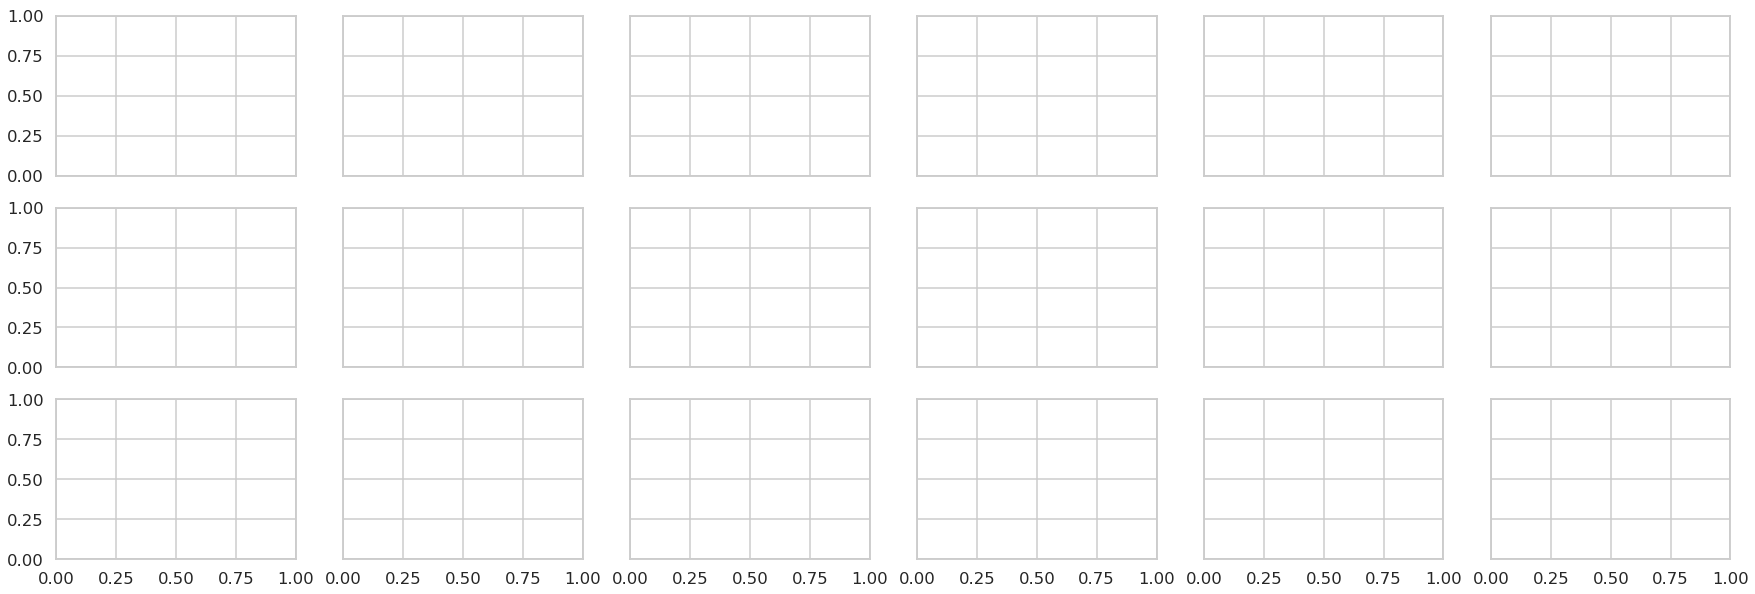

In [10]:
# MULTIPLE LOCATIONS ON A SINGLE FIGURE (just loca) 
#TODO
    
fig, axes = plt.subplots(ncols=6, nrows=3, sharex=True, sharey=True, figsize=(30, 10), squeeze=False)

rcp = 'rcp45'
# rcp = 'rcp85'

for i, (staid, row) in enumerate(lookup[lookup.LNG_GAGE < -70].iterrows()):

    plt.sca(axes.flat[i])
    
#     df_bcsd = get_bcsd_df(row.seg_id2, huc=row.HUC02)
#     df_obs = get_obs(staid)
    df = get_loca_df(row.seg_id2)
    
    hist = make_fdc_data(df['1970': '1999'].filter(regex=f'{rcp}'))
    if (rcp == 'rcp85'):
        rcp85 = make_fdc_data(df['2070': '2099'].filter(regex='rcp85'))
        print('reading rcp85')
        lines0 = plt.plot(hist.index, hist.values, color=hist_color, lw=0.5, alpha=0.5, zorder=10)
#         lines2 = plt.plot(rcp45.index, rcp45.values, color=rcp_color, lw=0.5, alpha=0.5)
        lines2 = plt.plot(rcp85.index, rcp85.values, color=rcp_color, lw=0.5, alpha=0.5)
    
    if (rcp == 'rcp45'):
        rcp45 = make_fdc_data(df['2070': '2099'].filter(regex='rcp45'))
        print('reading rcp45')
    
        lines0 = plt.plot(hist.index, hist.values, color=hist_color, lw=0.5, alpha=0.5, zorder=10)
        lines2 = plt.plot(rcp45.index, rcp45.values, color=rcp_color, lw=0.5, alpha=0.5)
#         lines2 = plt.plot(rcp85.index, rcp85.values, color=rcp_color, lw=0.5, alpha=0.5)

    plt.yscale('log')
    plt.ylim(ymax=np.percentile(df['1970': '1999'], 99.999) * 1.1, ymin=np.percentile(df['1970': '1999'], 0.0001) * .9)
    #plt.xlabel(row.STANAME)
    
    plt.xlabel(f'HUC: {row.HUC02}, {row.STATE}')
    plt.ylim([.01, 1000]) 
#     plt.figlegend((lines0[0], lines2[0]), ('Historical', 'RCP 8.5'))

fig.suptitle(f'Exceedance probability for Gage II stations, {rcp}, category: {size} ', fontsize=36, y=1.02)
fig.savefig(f'/glade/u/home/jvano/workdir/loca_figs/fdc_ensemble_gageII_{rcp}_{size}.png', bbox_inches='tight', dpi=100)



/glade/u/home/jvano/miniconda/envs/loca/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead.
  after removing the cwd from sys.path.
/glade/u/home/jvano/miniconda/envs/loca/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
/glade/u/home/jvano/miniconda/envs/loca/lib/python3.6/site-packages/pandas/io/parsers.py:2379: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/glade/u/home/jvano/miniconda/envs/loca/lib/python3.6/site-packages/pandas/io/parsers.py:2381: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/glade/u/home/jvano/miniconda/envs/loca/lib/python3.6/site-p

FileNotFoundError: [Errno 2] No such file or directory: '/glade/work/mizukami/data/streamflow_obs/008041500_streamflow_1980_leap.txt'

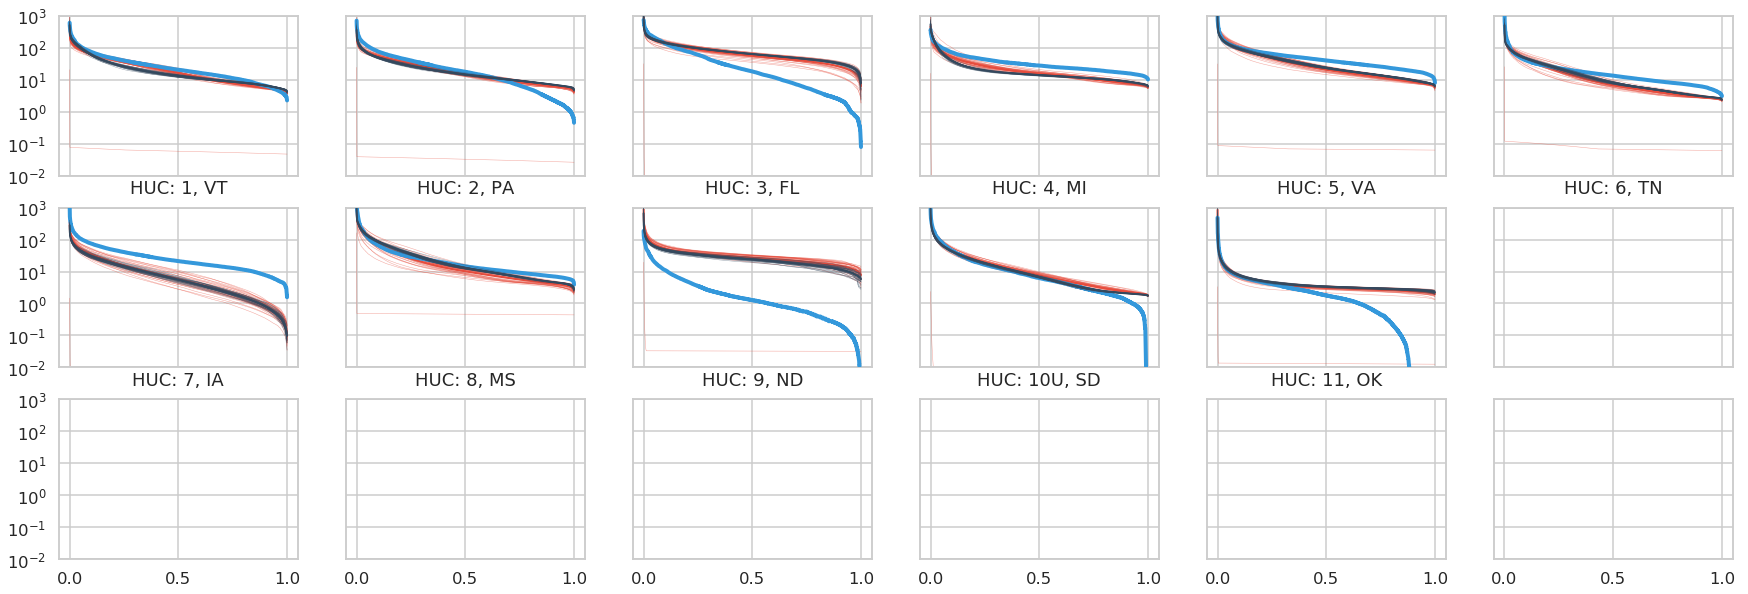

In [21]:
# TRYING TO LOOP OVER FIGURE 2.  DIDN'T WORK.  NEED TO START OVER, JUST BUILD ON OTHER PLOT
    
# fig, axes = plt.subplots(ncols=6, nrows=3, sharex=True, sharey=True, figsize=(30, 10), squeeze=False)

# rcp = 'rcp85'

# for i, (staid, row) in enumerate(lookup[lookup.LNG_GAGE < -70].iterrows()):

#     lines = []
#     labels = []
    
#     plt.sca(axes.flat[i])
    
# # #     df_bcsd = get_bcsd_df(row.seg_id2, huc=row.HUC02)
#     df_obs = get_obs(staid)
#     df = get_loca_df(row.seg_id2)

#     obs = make_fdc_data(df_obs['1970': '1999'])
#     obs_line = plt.plot(obs.index, obs.mean(axis=1).values, color=obs_color, lw=4, zorder=10, ls='-',)
#     lines.append(obs_line[0])
#     labels.append('Observations')
    
#     hist = make_fdc_data(df['1970': '1999'].filter(regex=f'{rcp}'))
# #     rcp45 = make_fdc_data(df['2070': '2099'].filter(regex='rcp45'))
# #     rcp85 = make_fdc_data(df['2070': '2099'].filter(regex='rcp85'))

    
#     lines0 = plt.plot(hist.index, hist.values, color=hist_color, lw=0.5, alpha=0.5, zorder=10)
#     lines2 = plt.plot(rcp85.index, rcp85.values, color=rcp_color, lw=0.5, alpha=0.5)
#     plt.yscale('log')
#     plt.ylim(ymax=np.percentile(df['1970': '1999'], 99.999) * 1.1, ymin=np.percentile(df['1970': '1999'], 0.0001) * .9)
#     #plt.xlabel(row.STANAME)
    
#     lines0 = plt.plot(hist.index, hist.mean(axis=1).values, color=hist_color, lw=2, zorder=10)
# #     lines1 = plt.plot(rcp45.index, rcp45.mean(axis=1).values, color='orange', lw=2, ls=ls)
#     lines2 = plt.plot(rcp85.index, rcp85.mean(axis=1).values, color=rcp_color, lw=2)

#     lines.extend([lines0[0], lines2[0]])
# #     labels.extend([f'{label}-Historical', f'{label}-RCP 8.5'])
    
    
#     plt.xlabel(f'HUC: {row.HUC02}, {row.STATE}')
#     plt.ylim([.01, 1000]) 
# #     plt.figlegend((lines0[0], lines2[0]), ('Historical', 'RCP 8.5'))

# fig.suptitle(f'Exceedance probability for Gage II stations, {rcp}, category: {size} ', fontsize=36, y=1.02)
# fig.savefig(f'/glade/u/home/jvano/workdir/loca_figs/fdc_ensemble_gageII_hist_{size}.png', bbox_inches='tight', dpi=100)


In [11]:
bad_ids = []
#for staid, row in lookup[lookup.LNG_GAGE < -100].iterrows(): 
for staid, row in lookup[lookup.LNG_GAGE < -70].iterrows(): 
    try:
        df_bcsd = get_bcsd_df(row.seg_id2, huc=row.HUC02)
        df_obs = get_obs(staid)
        df_loca = get_loca_df(row.seg_id2)

    except Exception as e:
        bad_ids.append(staid)
        print('skipping %s' % staid)
        print(e)
        continue
        
#Note: loca runs for most (if not all locations), it's the bcsd data that appears to cause error
    make_figure_1(outfilename=f'/glade/u/home/jvano/workdir/loca_figs/fdc_ensemble_{staid}_huc{row.HUC02}_{size}.png', name=row.STANAME, huc=row.HUC02)
    make_figure_2(outfilename=f'/glade/u/home/jvano/workdir/loca_figs/fdc_ensemble_avg_{staid}_huc{row.HUC02}_{size}.png', name=row.STANAME, huc=row.HUC02)
#     make_figure_1(outfilename=f'/glade/u/home/jhamman/workdir/loca_figs/fdc_ensemble_{staid}.png', name=row.STANAME)
#     make_figure_2(outfilename=f'/glade/u/home/jhamman/workdir/loca_figs/fdc_ensemble_avg_{staid}.png', name=row.STANAME)

NameError: name 'lookup' is not defined

In [18]:
def make_figure_3(outfilename=None, name=None, state=None):
#def make_figure_1(outfilename=None, name=None):
    
    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(12, 4))
    # Why not displaying?
    
    for i, (df, label) in enumerate([(df_bcsd, 'BCSD'), (df_loca, 'LOCA')]):
        plt.sca(axes[i])

        hist = make_fdc_data(df['1970': '1999'].filter(regex='rcp85'))
        rcp45 = make_fdc_data(df['2070': '2099'].filter(regex='rcp45'))
        rcp85 = make_fdc_data(df['2070': '2099'].filter(regex='rcp85'))

        lines0 = plt.plot(hist.index, hist.values, color=hist_color, lw=0.5, alpha=0.5, zorder=10)
        lines1 = plt.plot(rcp45.index, rcp45.values, color=obs_color, lw=0.5, alpha=0.5)
        lines2 = plt.plot(rcp85.index, rcp85.values, color=rcp_color, lw=0.5, alpha=0.5)
        plt.yscale('log')
        plt.ylim(ymax=np.percentile(df['1970': '1999'], 99.999) * 1.1, ymin=np.percentile(df['1970': '1999'], 0.0001) * .9)
        plt.xlabel('Exceedance probability')
        plt.ylabel('Streamflow ($m^3 s^{-1})$')
        plt.title(label)

    plt.figlegend((lines0[0], lines1[0], lines2[0]), ('Historical', 'RCP 4.5', 'RCP 8.5'))
        
    
    if name:
        fig.suptitle(f'{name}, {state}', y=1.02)
    
    if outfilename is not None:
        fig.savefig(outfilename, bbox_inches='tight', dpi=300)
        

/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc
/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc
/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc
/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc
/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc
/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc
/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc
/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc
/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc
/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc
/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc
/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc
/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc
/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc
/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc
/glade/p/r

/glade/u/home/jvano/miniconda/envs/loca/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc


/glade/u/home/jvano/miniconda/envs/loca/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc


/glade/u/home/jvano/miniconda/envs/loca/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc


/glade/u/home/jvano/miniconda/envs/loca/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc


/glade/u/home/jvano/miniconda/envs/loca/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc


/glade/u/home/jvano/miniconda/envs/loca/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc


/glade/u/home/jvano/miniconda/envs/loca/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc


/glade/u/home/jvano/miniconda/envs/loca/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc


/glade/u/home/jvano/miniconda/envs/loca/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc


/glade/u/home/jvano/miniconda/envs/loca/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc


/glade/u/home/jvano/miniconda/envs/loca/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc


/glade/u/home/jvano/miniconda/envs/loca/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc


/glade/u/home/jvano/miniconda/envs/loca/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc


/glade/u/home/jvano/miniconda/envs/loca/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc


/glade/u/home/jvano/miniconda/envs/loca/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc


/glade/u/home/jvano/miniconda/envs/loca/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc


/glade/u/home/jvano/miniconda/envs/loca/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc


/glade/u/home/jvano/miniconda/envs/loca/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc


/glade/u/home/jvano/miniconda/envs/loca/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc


/glade/u/home/jvano/miniconda/envs/loca/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc


/glade/u/home/jvano/miniconda/envs/loca/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc


/glade/u/home/jvano/miniconda/envs/loca/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc


/glade/u/home/jvano/miniconda/envs/loca/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


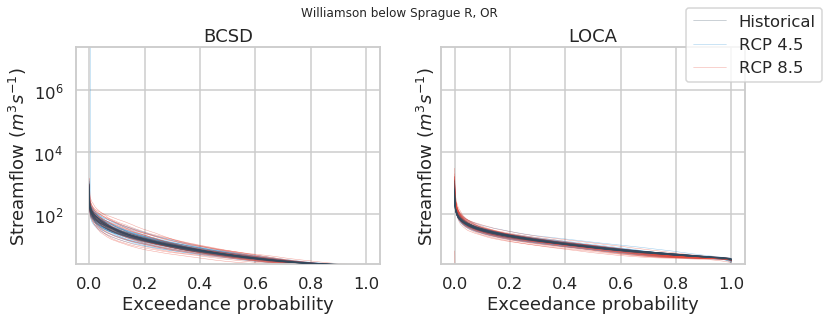

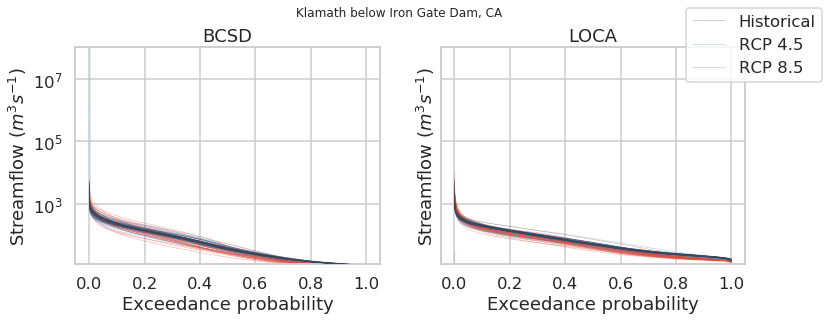

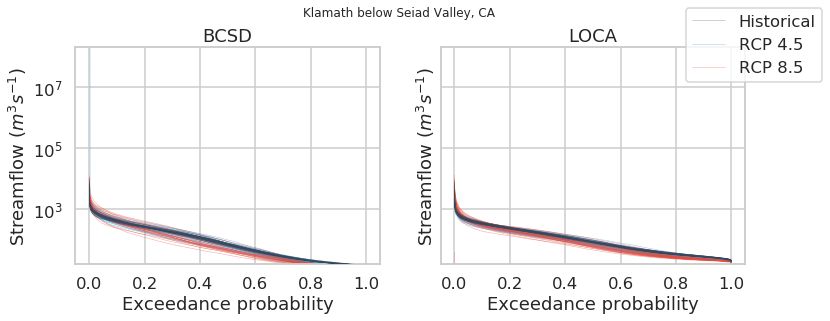

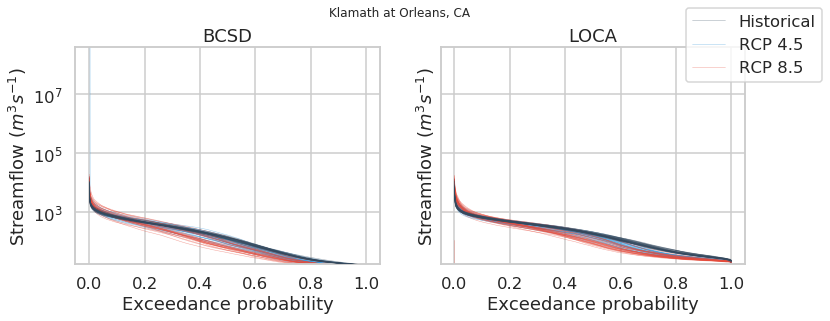

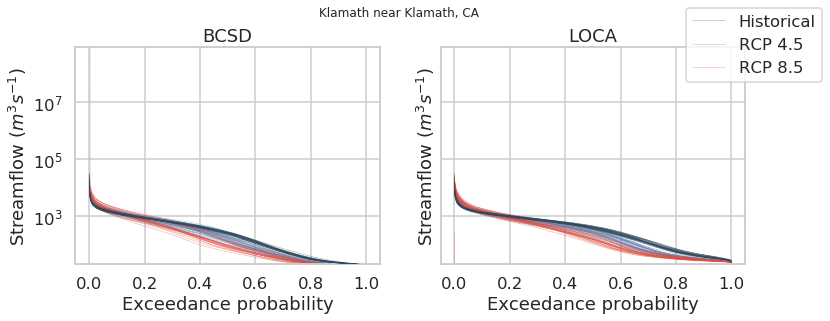

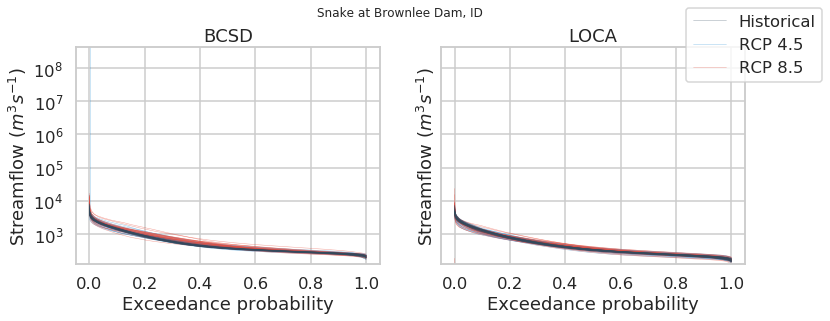

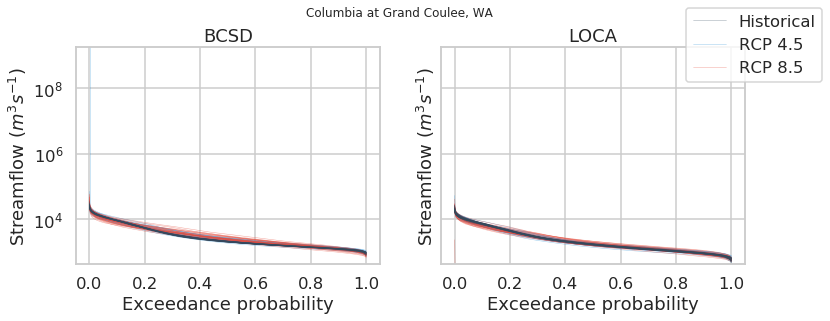

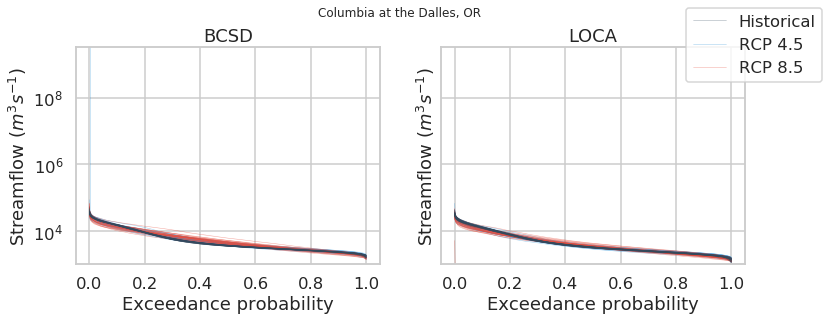

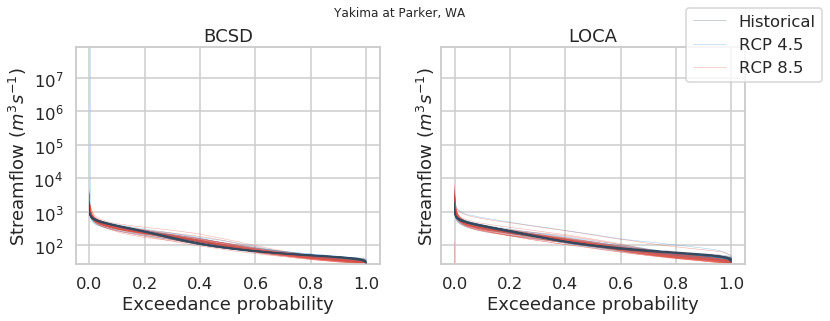

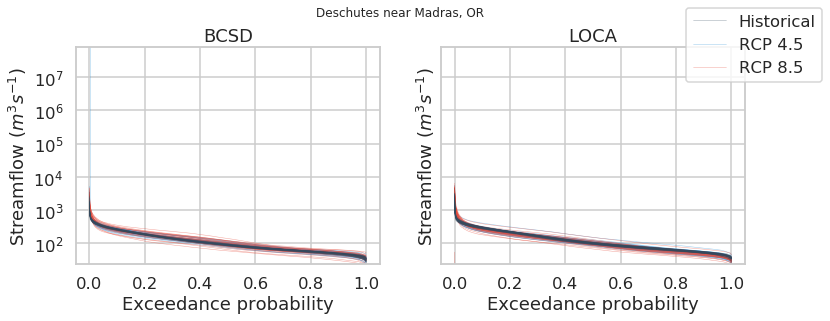

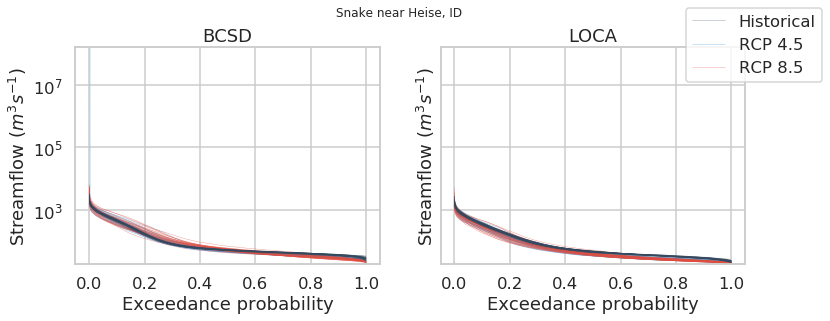

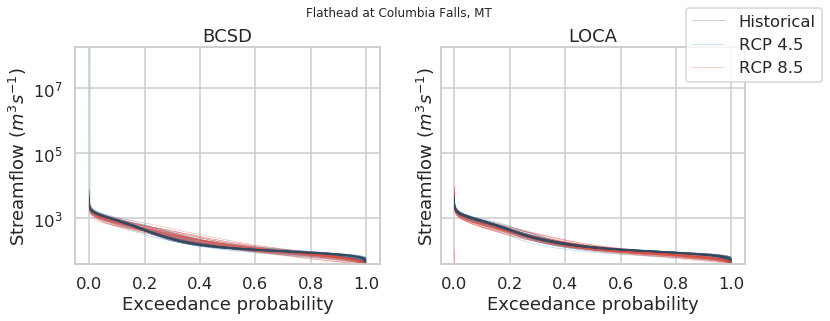

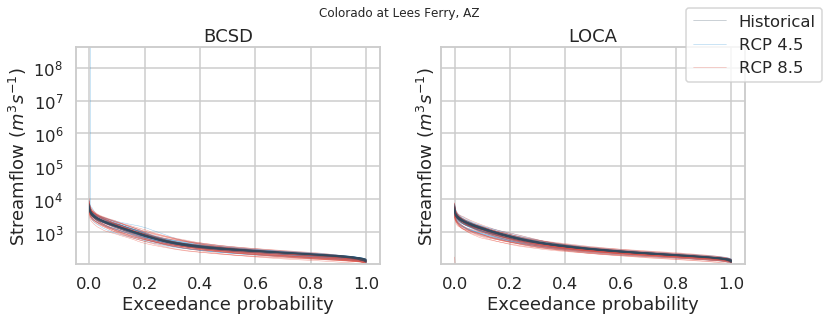

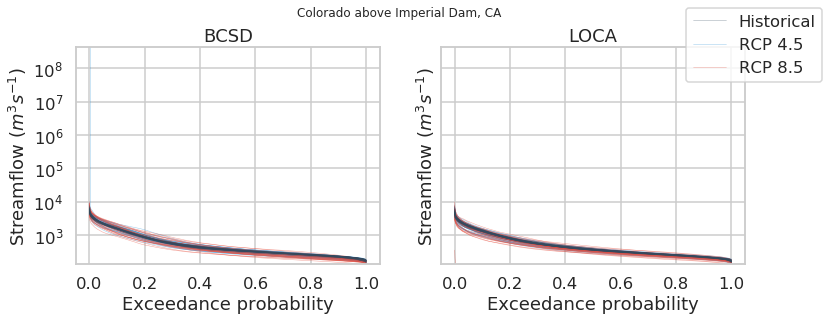

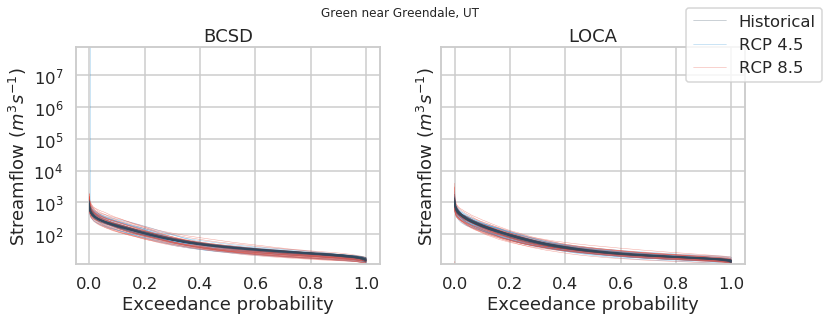

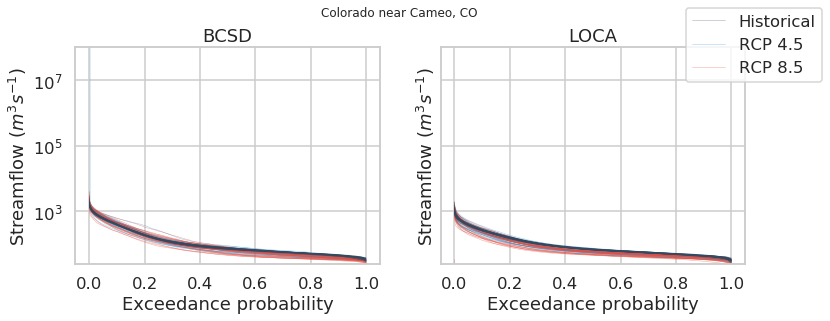

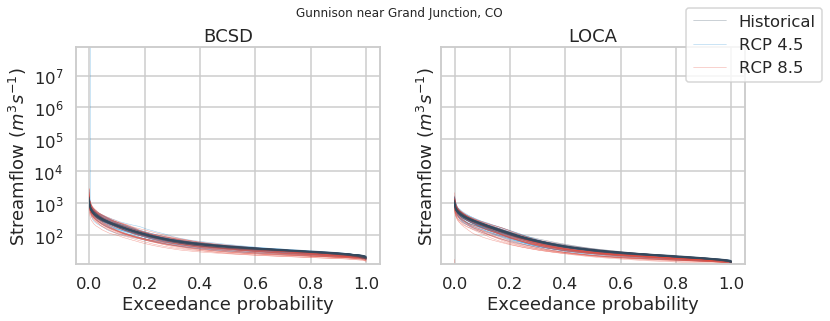

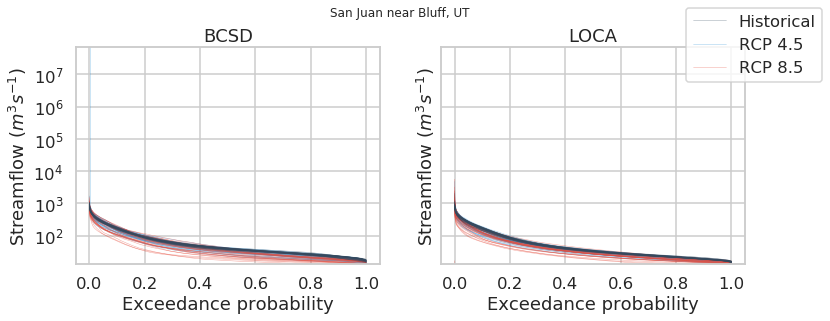

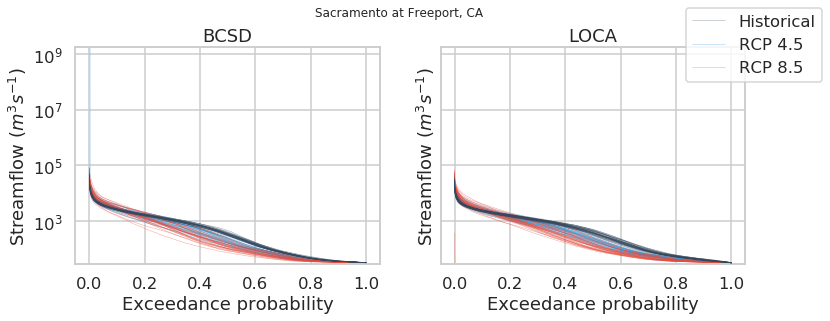

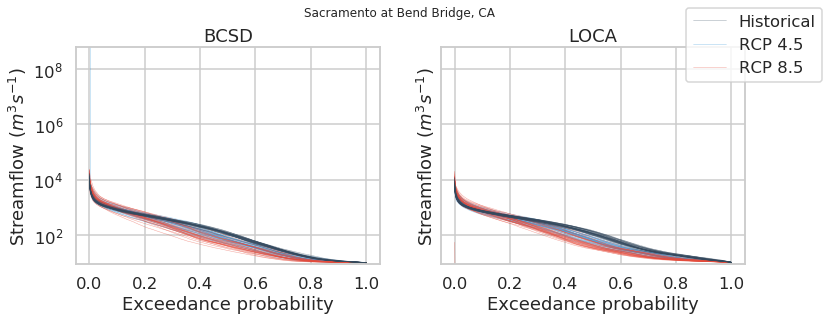

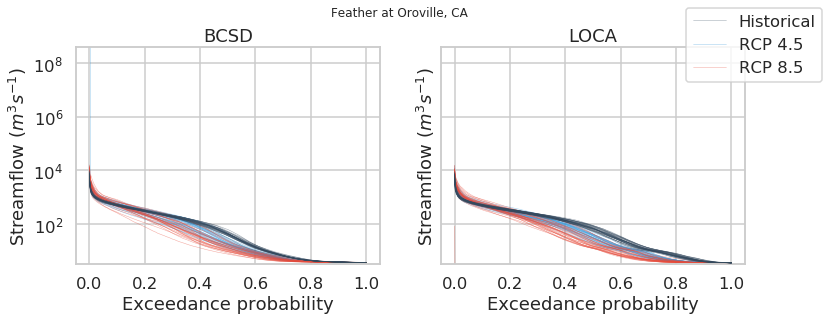

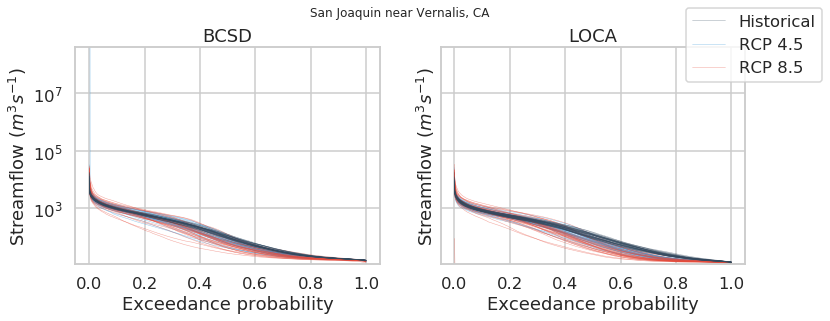

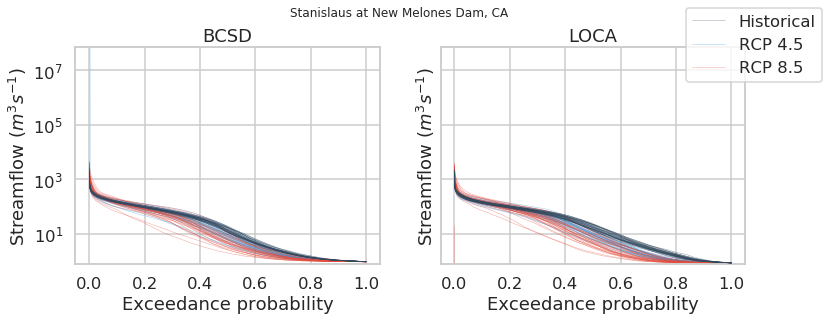

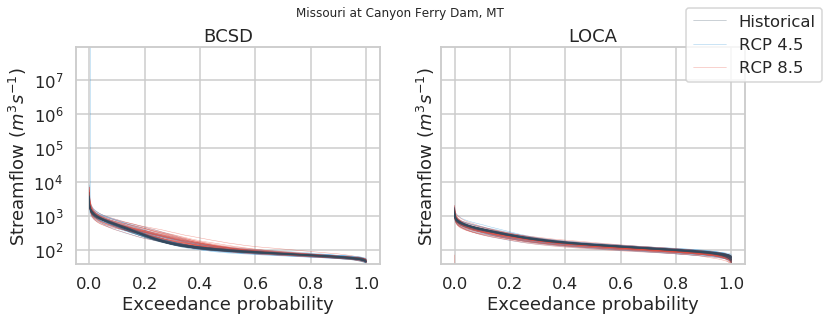

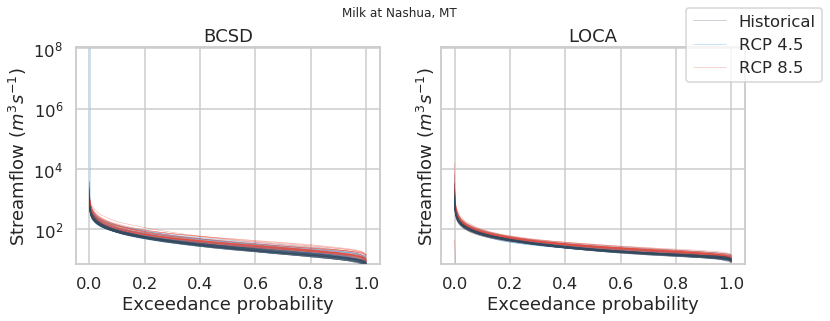

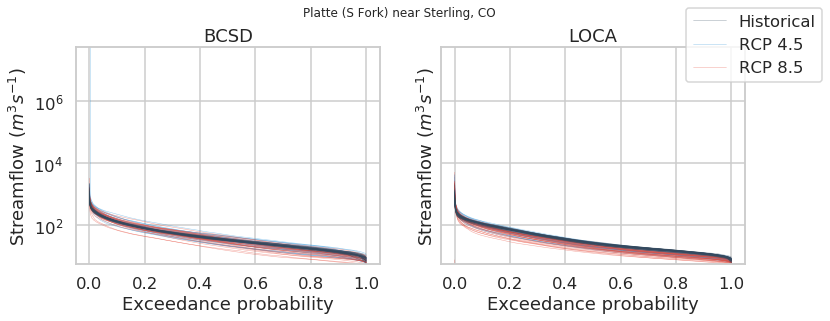

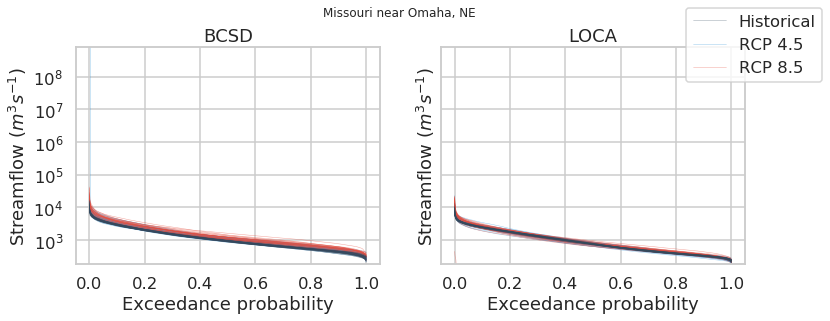

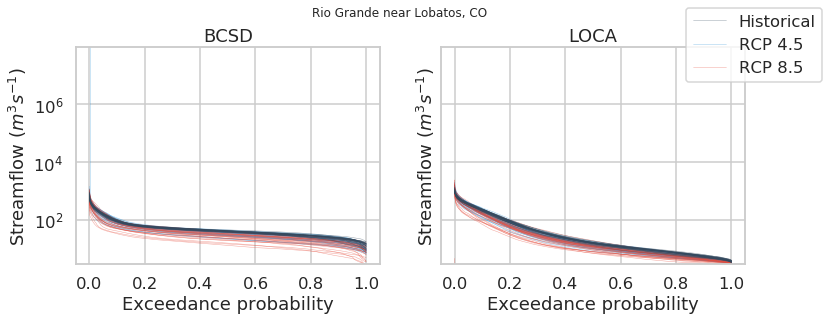

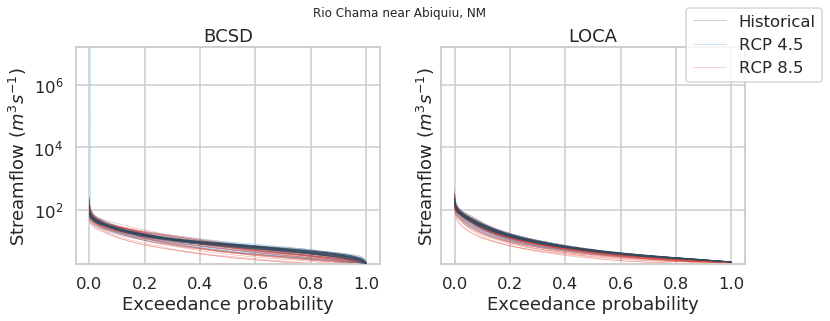

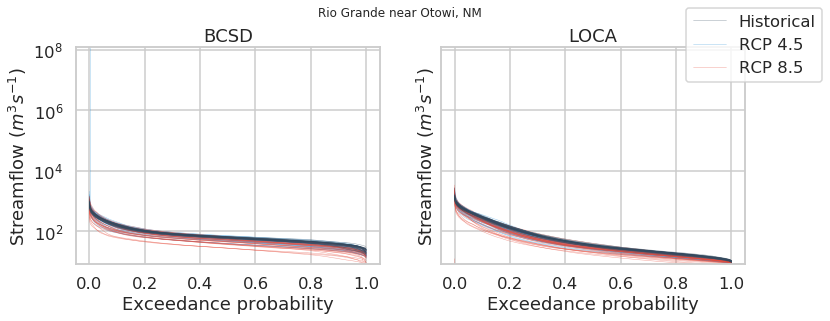

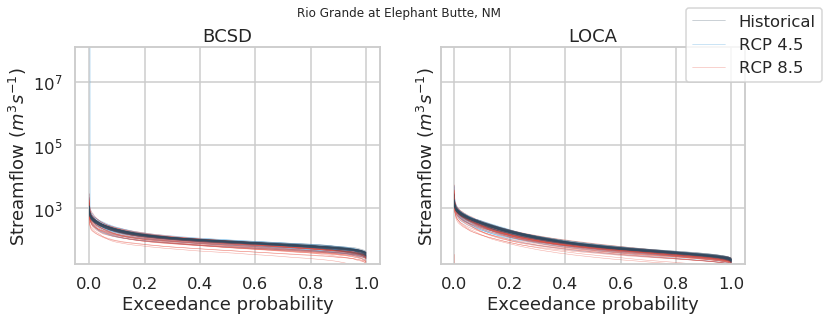

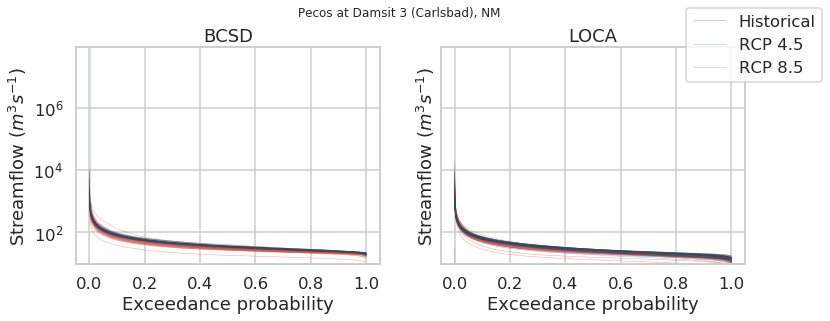

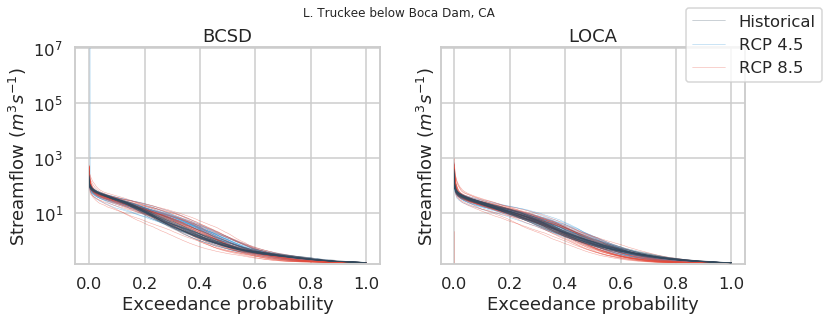

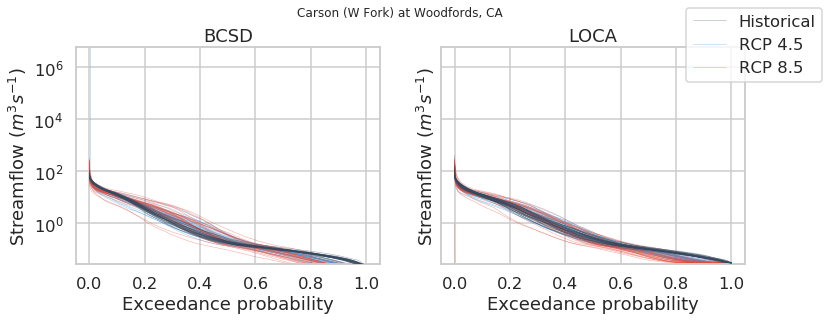

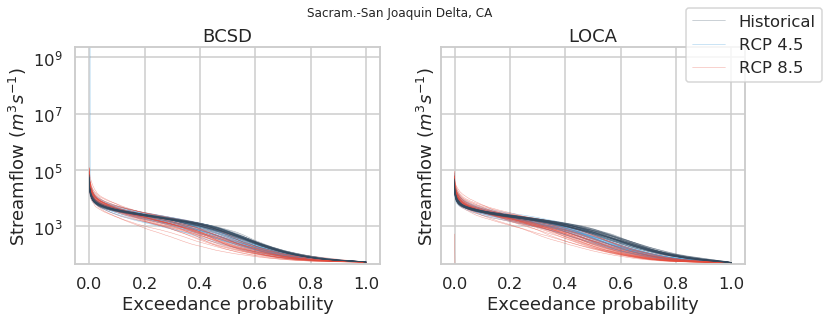

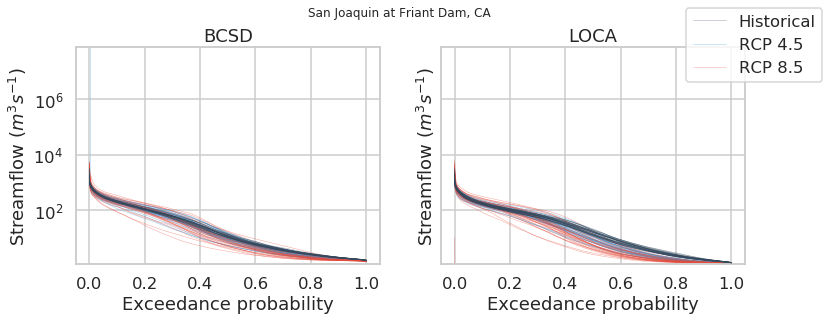

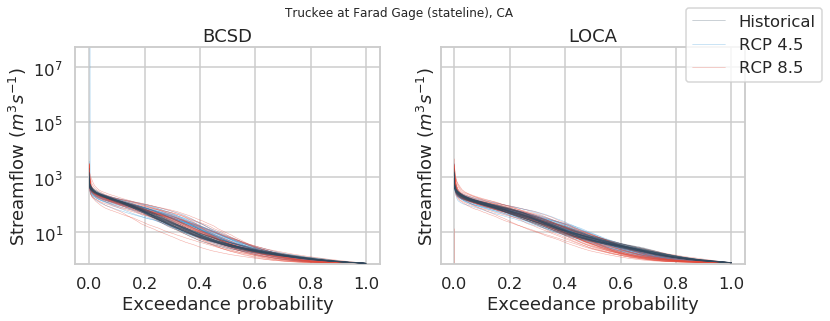

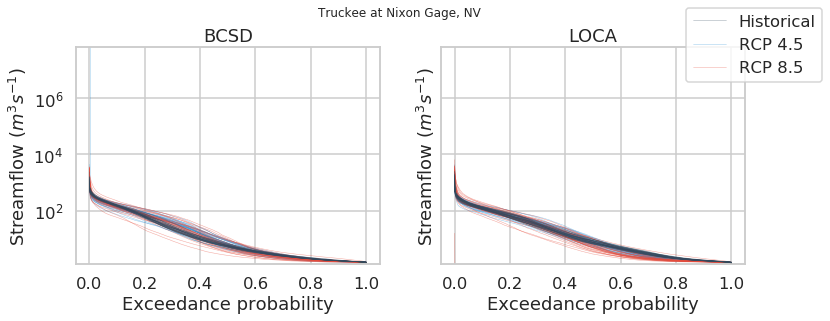

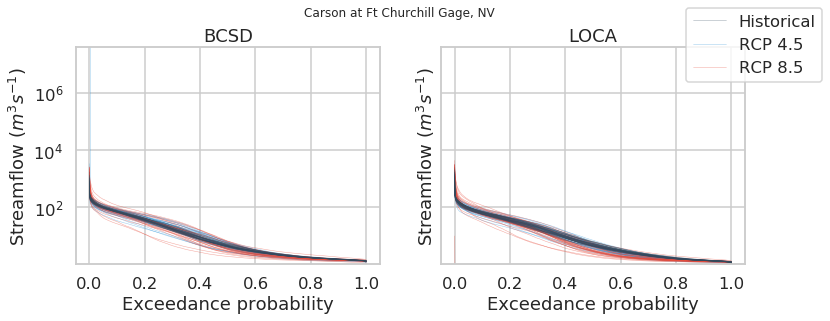

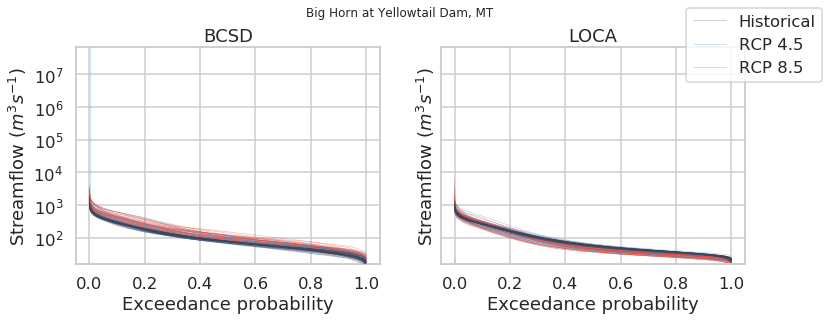

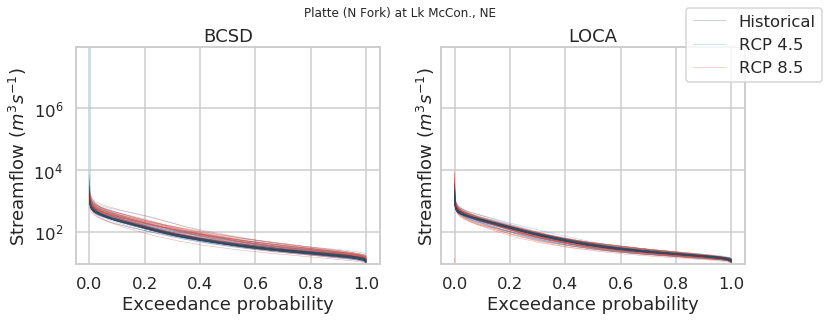

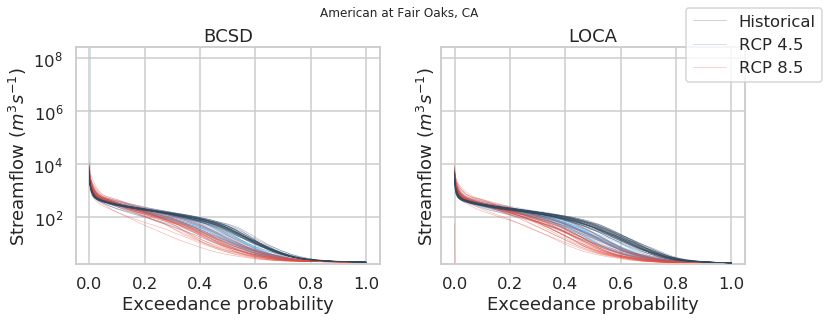

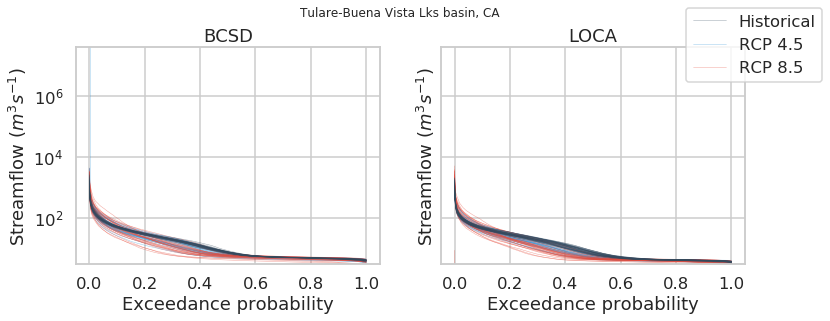

In [19]:
bad_ids = []
#for staid, row in lookup[lookup.LNG_GAGE < -100].iterrows(): 
for staid, row in lookup_bor.iterrows(): 
    try:
        df_bcsd = get_bcsd_df_bor(row.segid, huc=None)
#         df_obs = get_obs_bor(staid)
        df_loca = get_loca_df_bor(row.segid)

    except Exception as e:
        bad_ids.append(staid)
        print('skipping %s' % staid)
        print(e)
        continue
        
#Note: loca runs for most (if not all locations), it's the bcsd data that appears to cause error
    make_figure_3(outfilename=f'/glade/u/home/jvano/workdir/loca_figs/fdc_ensemble_bor_bcsd_loca_{staid}.png', name=row.Name, state=row.State)

/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc
reading rcp85
/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc
reading rcp85
/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc
reading rcp85
/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc
reading rcp85
/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc
reading rcp85
/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc
reading rcp85
/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc
reading rcp85
/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc
reading rcp85
/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc
reading rcp85
/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc
reading rcp85
/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc
reading rcp85
/glade/p/ral/hap/jvano/bcsd/bor_cmip5_basin/*1.routed.selected.nc
reading rcp85
/glade/p/ral/hap/jvano/bcsd/bor_cmip5_ba

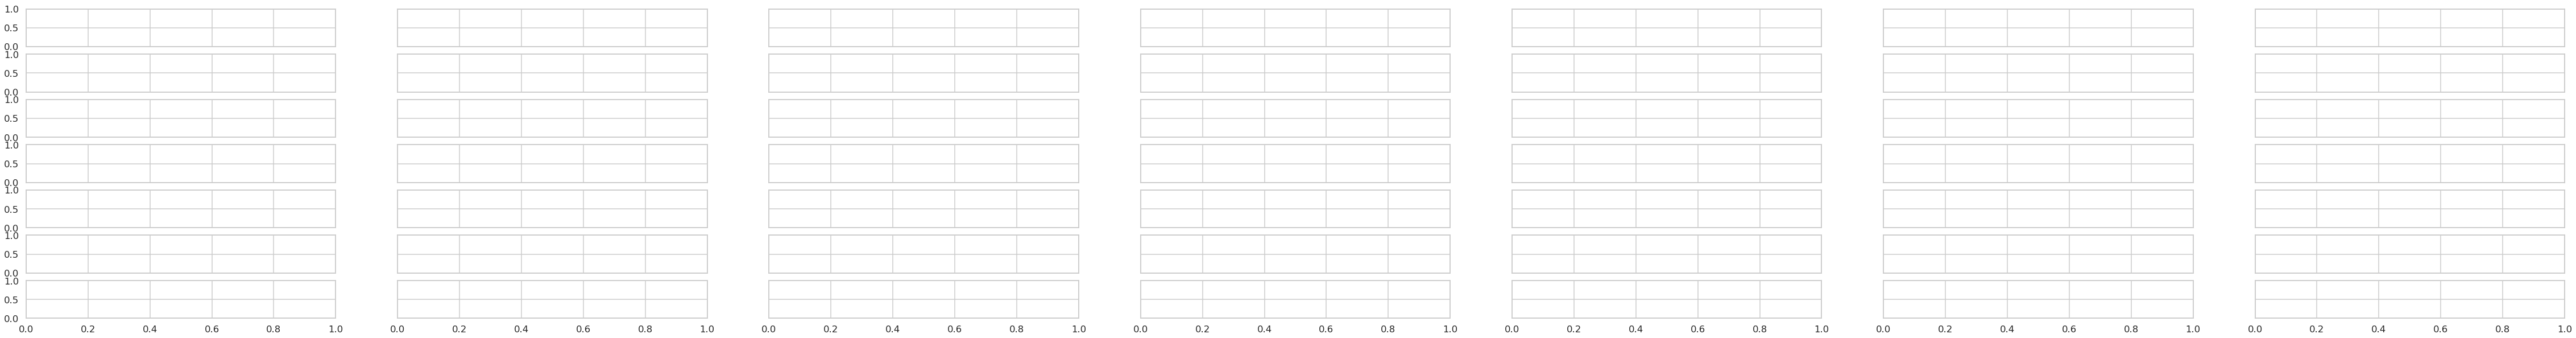

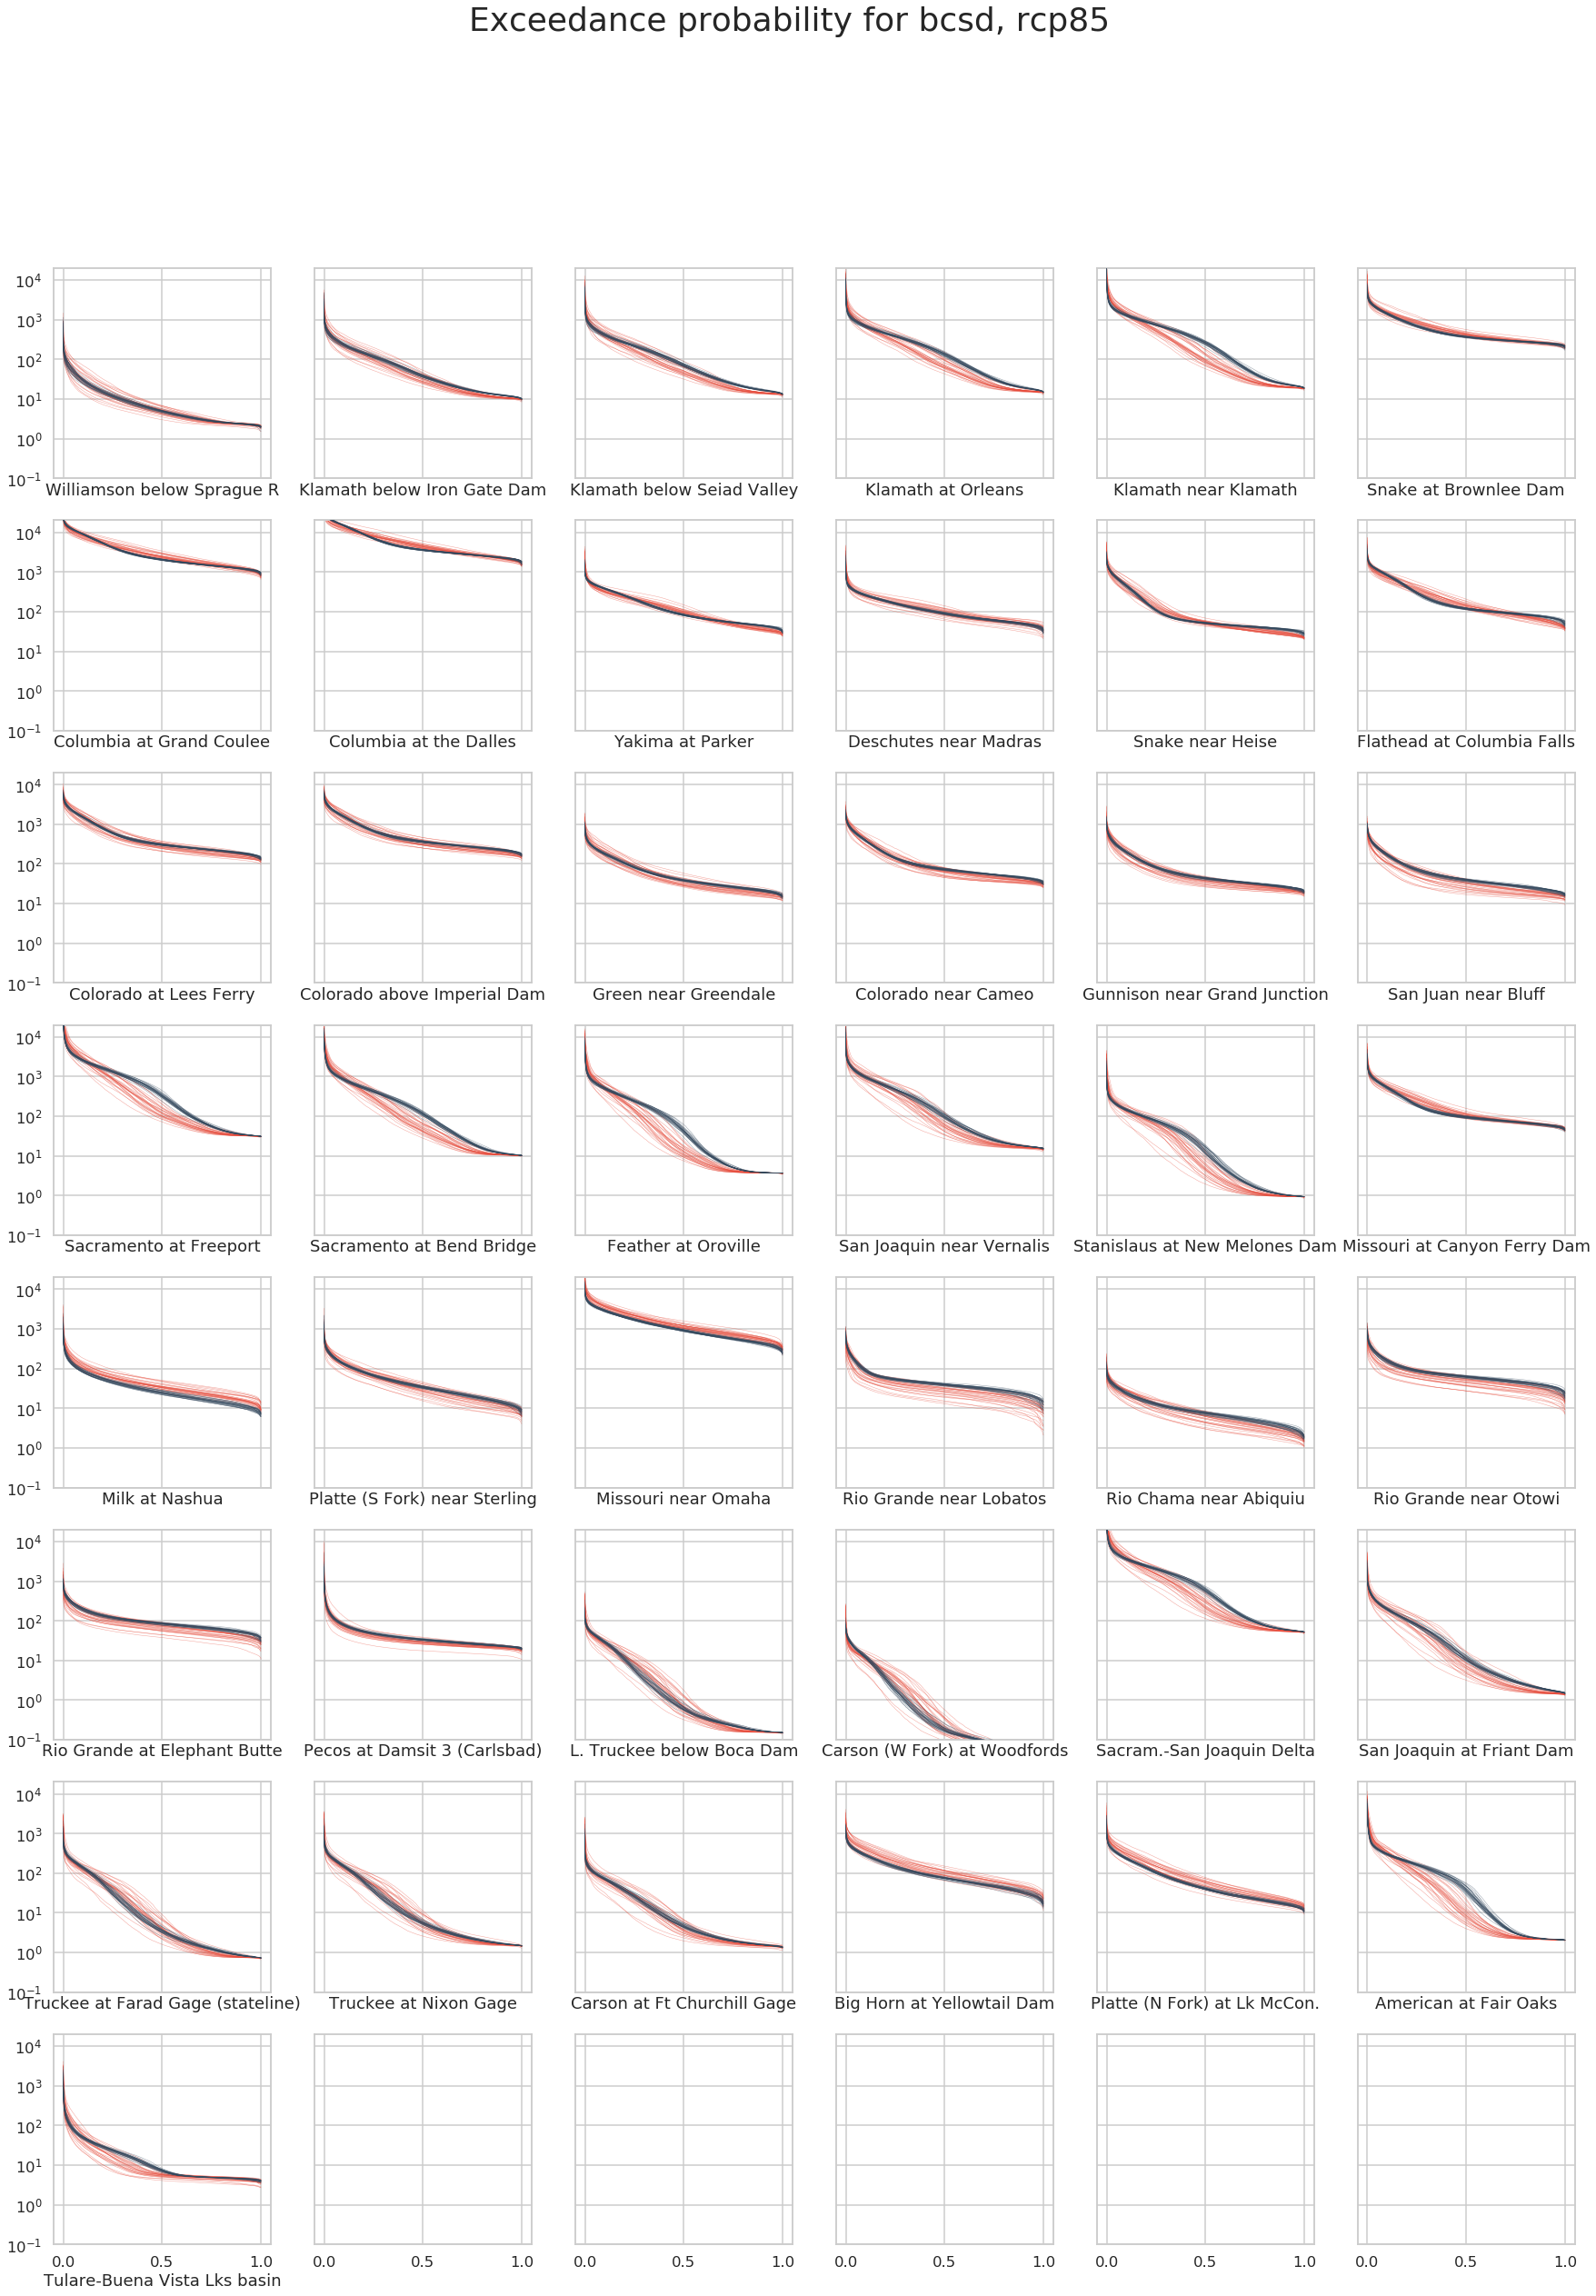

In [11]:
# MULTIPLE LOCATIONS ON A SINGLE FIGURE (just loca) 
#TODO
    
fig, axes = plt.subplots(ncols=7, nrows=7, sharex=True, sharey=True, figsize=(80, 10), squeeze=False)
# fig, axes = plt.subplots(ncols=6, nrows=3, sharex=True, sharey=True, figsize=(30, 10), squeeze=False)
fig, axes = plt.subplots(ncols=6, nrows=8, sharex=True, sharey=True, figsize=(30, 10*4), squeeze=False)

#downscale = 'loca'
downscale = 'bcsd'
# rcp = 'rcp45'
rcp = 'rcp85'

for i, (staid, row) in enumerate(lookup_bor.iterrows()):

    plt.sca(axes.flat[i])
    
#     df_bcsd = get_bcsd_df(row.seg_id2, huc=row.HUC02)
#     df_obs = get_obs(staid)
    
    if (downscale == 'loca'):
        df = get_loca_df_bor(row.segid)
    if (downscale == 'bcsd'):
        df = get_bcsd_df_bor(row.segid, huc=None)
    
    hist = make_fdc_data(df['1970': '1999'].filter(regex=f'{rcp}'))
    if (rcp == 'rcp85'):
        rcp85 = make_fdc_data(df['2070': '2099'].filter(regex='rcp85'))
        print('reading rcp85')
        lines0 = plt.plot(hist.index, hist.values, color=hist_color, lw=0.5, alpha=0.5, zorder=10)
#         lines2 = plt.plot(rcp45.index, rcp45.values, color=rcp_color, lw=0.5, alpha=0.5)
        lines2 = plt.plot(rcp85.index, rcp85.values, color=rcp_color, lw=0.5, alpha=0.5)
    
    if (rcp == 'rcp45'):
        rcp45 = make_fdc_data(df['2070': '2099'].filter(regex='rcp45'))
        print('reading rcp45')
    
        lines0 = plt.plot(hist.index, hist.values, color=hist_color, lw=0.5, alpha=0.5, zorder=10)
        lines2 = plt.plot(rcp45.index, rcp45.values, color=rcp_color, lw=0.5, alpha=0.5)
#         lines2 = plt.plot(rcp85.index, rcp85.values, color=rcp_color, lw=0.5, alpha=0.5)

    plt.yscale('log')
    plt.ylim(ymax=np.percentile(df['1970': '1999'], 99.999) * 1.1, ymin=np.percentile(df['1970': '1999'], 0.0001) * .9)
    #plt.xlabel(row.STANAME)
    
    plt.xlabel(f'{row.Name}')
    plt.ylim([.1, 20000]) 
#     plt.figlegend((lines0[0], lines2[0]), ('Historical', 'RCP 8.5'))

fig.suptitle(f'Exceedance probability for {downscale}, {rcp}', fontsize=36)
fig.savefig(f'/glade/u/home/jvano/workdir/loca_figs/fdc_ensemble_bor_{downscale}_{rcp}.png', bbox_inches='tight', dpi=100)
